In [5]:
import torch
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [3]:
metadata_df = pd.read_csv('/global/D1/homes/vajira/data/sperm/visem/visem-dataset/videos/data/metadata.csv')

In [4]:
metadata_df.head()

,file_name,Serum C14:0 (myristic acid),Serum C16:0 (palmitic acid),Serum C16:1 (palmitoleic acid),Serum C18:0 (stearic acid),Serum C18:1 n-9 (oleic acid),Serum total C18:1,"Serum C18:2 n-6 (linoleic acid, LA)","Serum C18:3 n-6 (gamma-linoleic acid, GLA)",Serum C20:1 n-9,...,"High DNA stainability, HDS (%)","DNA fragmentation index, DFI (%)",Seminal plasma anti-Müllerian hormone (AMH) (pmol/L),Serum total testosterone (nmol/L),Serum oestradiol (nmol/L),"Serum sex hormone-binding globulin, SHBG (nmol/L)","Serum follicle-stimulating hormone, FSH (IU/L)","Serum Luteinizing hormone, LH (IU/L)",Serum inhibin B (ng/L),"Serum anti-Müllerian hormone, AMH (pmol/L)"
0,1.avi,"0,36","29,72","0,64","13,67","9,00","10,90","19,48","0,30","0,16",...,13,29,64,"16,8","0,13",15,"2,3","4,2",289,54
1,2.avi,"0,28","31,22","0,47","11,84","9,02","11,29","20,34","0,22","0,25",...,13,57,423,15,"0,15",43,"7,2","2,7",164,19
2,3.avi,"0,36","27,95","0,47","16,57","8,65","10,36","23,75","0,26","0,19",...,11,12,37,"8,2","0,18",32,"4,2","4,8",67,47
3,4.avi,"0,32","28,10","0,64","16,09","8,56","10,13","21,52","0,17","0,11",...,10,15,257,"11,2","0,15",11,"8,5","5,6",132,29
4,5.avi,"0,40","29,94","0,80","14,17","9,47","11,02","22,29","0,38","0,15",...,21,13,2203,"11,9","0,14",18,"2,6","2,1",139,68


In [26]:
metadata_df['Sperm concentration (x10⁶/mL)']

0     105,3
1      45,4
2      50,0
3      42,9
4      32,8
      ...  
80     62,0
81     22,0
82    148,0
83     43,0
84    184,0
Name: Sperm concentration (x10⁶/mL), Length: 85, dtype: object

array([[<Axes: title={'center': 'Age (years)'}>,
        <Axes: title={'center': 'Sperm vitality (%)'}>,
        <Axes: title={'center': 'Progressive motility (%)'}>],
       [<Axes: title={'center': 'Non progressive sperm motility (%)'}>,
        <Axes: title={'center': 'Immotile sperm (%)'}>,
        <Axes: title={'center': 'High DNA stainability, HDS (%)'}>],
       [<Axes: title={'center': 'DNA fragmentation index, DFI (%)'}>,
        <Axes: title={'center': 'Seminal plasma anti-Müllerian hormone (AMH) (pmol/L)'}>,
        <Axes: title={'center': 'Serum sex hormone-binding globulin, SHBG (nmol/L)'}>],
       [<Axes: title={'center': 'Serum inhibin B (ng/L)'}>,
        <Axes: title={'center': 'Serum anti-Müllerian hormone, AMH (pmol/L)'}>,
        <Axes: >]], dtype=object)

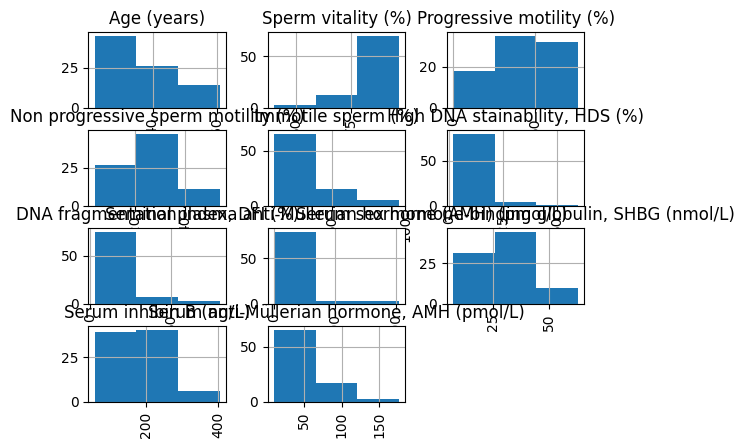

In [34]:
# Plot sperm concentration distribution
metadata_df.hist(bins=3, xrot=90)

In [9]:
print(list(metadata_df.columns))

['file_name', 'Serum C14:0 (myristic acid)', 'Serum C16:0 (palmitic acid)', 'Serum C16:1 (palmitoleic acid)', 'Serum C18:0 (stearic acid)', 'Serum C18:1 n-9 (oleic acid)', 'Serum total C18:1', 'Serum C18:2 n-6 (linoleic acid, LA)', 'Serum C18:3 n-6 (gamma-linoleic acid, GLA)', 'Serum C20:1 n-9', 'Serum C20:2 n-6', 'Serum C20:3 n-6', 'Serum C20:4 n-6', 'Serum C20:5 n-3  (eicosapentaenoic acid, EPA)', 'Serum C22:5 n-3 (docosapentaenoic acid, DPA)', 'Serum C22:6 n-3 (docosahexaenoic acid, DHA)', 'Sperm C14:0 (myristic acid)', 'Sperm C15:0 (pentadecanoic acid)', 'Sperm C16:0 (palmitic acid)', 'Sperm C16:1 n-7 (palmitoleic acid)', 'Sperm C17:0', 'Sperm C18:0 (stearic acid)', 'Sperm C18:1 trans n-6 to n-11', 'Sperm C18:1 n-9 (oleic acid)', 'Sperm C18:1 n-7 to n-11', 'Sperm C18:2 n-6 (Linoleic acid, LA)', 'Sperm C20:0', 'Sperm C18:3 n-6 (gamma-linoleic acid, GLA)', 'Sperm C18:3 n-3 (a-linoleic acid, ALA)', 'Sperm C20:1 n-9', 'Sperm C20:2 n-6', 'Sperm C22:0', 'Sperm C20:3 n-6', 'Sperm C20:4 n-

In [6]:
skf = StratifiedKFold(n_splits=5)

In [22]:
folds = skf.split(metadata_df['file_name'], metadata_df['Sperm concentration (x10⁶/mL)'])

In [23]:
folds

<generator object _BaseKFold.split at 0x1553cfe00580>

In [39]:
print(list(metadata_df['Sperm concentration (x10⁶/mL)']))

['105,3', '45,4', '50,0', '42,9', '32,8', '52,0', '13,0', '21,0', '89,0', '40,0', '97,0', '29,4', '74,4', '3,8', '4,0', '305,0', '58,7', '93,1', '14,5', '70,9', '28,1', '12,0', '4,5', '159,0', '120,3', '86,8', '192,0', '6,8', '4,2', '39,6', '350,0', '99,0', '54,9', '116,0', '33,8', '53,6', '160,3', '12,3', '148,5', '68,9', '89,6', '33,0', '190,3', '98,4', '126,0', '33,4', '30,5', '46,7', '31,1', '208,8', '124,8', '6,9', '68,9', '19,8', '138,0', '186,0', '47,0', '62,0', '50,0', '13,4', '78,2', '70,0', '61,0', '104,0', '120,0', '42,0', '149,0', '26,8', '122,0', '119,0', '80,0', '121,0', '119,0', '106,0', '51,3', '15,8', '82,4', '187,0', '91,0', '108,0', '62,0', '22,0', '148,0', '43,0', '184,0']


In [43]:
metadata_df['Sperm concentration (x10⁶/mL)'] = metadata_df['Sperm concentration (x10⁶/mL)'].str.replace(",", ".").astype('float')

In [66]:
list(metadata_df.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84]

In [59]:
out = pd.qcut(metadata_df['Sperm concentration (x10⁶/mL)'], q=5, labels=["lower", "low", "medium", "high", "higher"])

In [62]:
out

0       high
1        low
2        low
3        low
4        low
       ...  
80    medium
81     lower
82    higher
83       low
84    higher
Name: Sperm concentration (x10⁶/mL), Length: 85, dtype: category
Categories (5, object): ['lower' < 'low' < 'medium' < 'high' < 'higher']

In [67]:
# combine out with metadata_df using index
metadata_df['folds'] = out

In [68]:
skf = StratifiedKFold(n_splits=5)

In [79]:
folds = skf.split(metadata_df['file_name'], metadata_df["folds"])

In [80]:
folds

<generator object _BaseKFold.split at 0x1553c7108890>

In [81]:
for i, (train_i, test_i)in enumerate(folds):
    print(i)
    print(train_i)
    print(test_i)
    # select rows from metadata_df using train_i and test_i
    #train_df = metadata_df.iloc[train_i]
    test_df = metadata_df.iloc[test_i]
    print("count of folds", test_df['folds'].value_counts())

0
[ 4  9 11 14 18 20 21 22 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84]
[ 0  1  2  3  5  6  7  8 10 12 13 15 16 17 19 23 26]
count of folds folds
medium    4
high      4
lower     3
low       3
higher    3
Name: count, dtype: int64
1
[ 0  1  2  3  5  6  7  8 10 12 13 15 16 17 19 22 23 26 27 28 29 34 37 39
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84]
[ 4  9 11 14 18 20 21 24 25 30 31 32 33 35 36 38 40]
count of folds folds
lower     4
high      4
low       3
medium    3
higher    3
Name: count, dtype: int64
2
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 30 31 32 33 35 36 38 40 46 47 48 50 51 53 54 55 56 58 59 60 61 62
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84]
[22 27 28 29 34 37 39 41 42 43 44 45 49 52 57 63 6

In [54]:
out.value_counts()

Sperm concentration (x10⁶/mL)
lower     17
low       17
medium    17
high      17
higher    17
Name: count, dtype: int64

In [24]:
for i, (_, _)in enumerate(folds):
    print(i)
    #print(file_name)
    #print(sperm_concentration)
    #print(metadata_df['Sperm concentration (x10⁶/mL)'][file_name])
    #print(metadata_df['Sperm concentration (x10⁶/mL)'][sperm_concentration])
    #print('---')

    

ValueError: n_splits=5 cannot be greater than the number of members in each class.